In [1]:
using CPTVCA
using ExactDiagonalization
using QuantumLattices
using Arpack
using LinearAlgebra
using Plots
colorbar = cgrad(:linear_tritanopic_krjcw_5_98_c46_n256, rev = true)

 11.409856 seconds (47.98 M allocations: 2.689 GiB, 4.66% gc time, 82.16% compilation time)


 11.266546 seconds (118.39 M allocations: 18.492 GiB, 13.98% gc time, 17.68% compilation time)


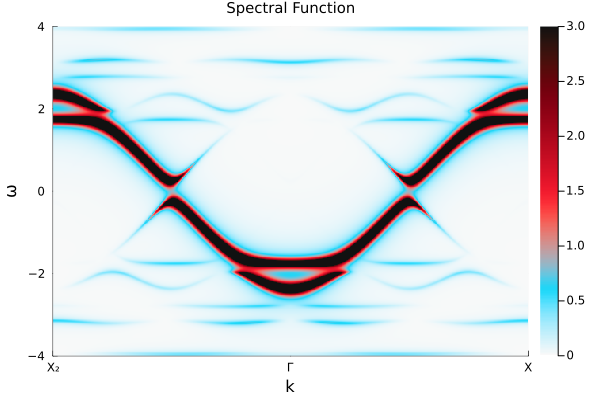

In [2]:
#1d lattice
unitcell = Lattice([0, 0]; vectors=[[1, 0]])
cluster = Lattice(unitcell, (4,), ('p',))
hilbert = Hilbert(site=>Fock{:f}(2, 2) for site=1:length(cluster))
cons= Conservation(8, 1//2; np=8, sz=0)
t = Hopping(:t, -1.0, 1)
U = Hubbard(:U, 2.0)
origiterms = (t, U)
t_r = Hopping(:t, -1.0, 1)
referterms = (t_r, U)
neighbors = Neighbors(0=>0.0, 1=>1.0)
@time vca = VCA(unitcell, cluster, hilbert, origiterms, referterms, cons; neighbors=neighbors, m=200)
#saveData(vca, "./temp/lineL2U4_vca.jls")
#vca = loadData(".temp/lineL2U4_vca.jls")
k_path = ReciprocalPath(reciprocals(unitcell.vectors), line"X₂-Γ-X", length=300)
ω_range = range(-4, 4, length=400)
fq = ω_range .+ (Parameters(vca.refergenerator)[:U]/2 + 0.05*im)
@time G = singleParticleGreenFunction(vca, k_path, fq)
A = spectrum(G)
f = plot(k_path, ω_range, A; xlabel="k", ylabel="ω", color=colorbar , title="Spectral Function",clims=(0, 3))
#savefig("./results/lineL2U4_spec.pdf")
#cgf = clusterGreenFunctionLoop(vca.solver, fq)

  0.612185 seconds (1.68 M allocations: 90.726 MiB, 3.59% gc time, 99.58% compilation time)
  1.610480 seconds (20.89 M allocations: 2.970 GiB, 15.70% gc time, 17.27% compilation time)


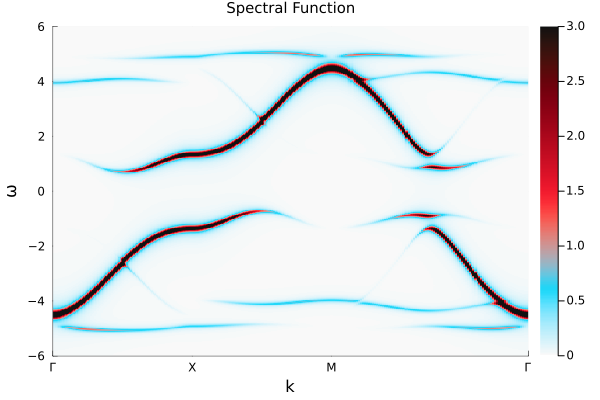

In [11]:
# square lattice
unitcell = Lattice([0, 0]; vectors=[[1, 0], [0, 1]])
cluster = Lattice(unitcell, (2,2), ('p','p'))
hilbert = Hilbert(site=>Fock{:f}(1, 2) for site=1:length(cluster))
cons= Conservation(4, 1//2; np=4,sz=0)
t1 = Hopping(:t1, -1.0, 1)
U = Hubbard(:U, 4.0)
origiterms = (t1, U)
t1r = Hopping(:t1r, -1.0, 1)
referterms = (t1r, U)
neighbors = Neighbors(0=>0.0, 1=>1.0)
@time vca = VCA(unitcell, cluster, hilbert, origiterms, referterms, cons; neighbors=neighbors, m=200)
#saveData(vca, "./temp/squareL4U4_vca.jls")
#vca = loadData("./temp/squareL4U4_vca.jls")
k_path = ReciprocalPath(reciprocals(unitcell.vectors), rectangle"Γ-X-M-Γ", length=100)
ω_range = range(-6, 6, length=400)
fq = ω_range .+ (Parameters(vca.refergenerator)[:U]/2 + 0.05*im)
@time G = singleParticleGreenFunction(vca, k_path, fq)
A = spectrum(G)
f = plot(k_path, ω_range, A; xlabel="k", ylabel="ω", color=colorbar, title="Spectral Function",clims=(0, 3))
#savefig("./results/squareL9U4_spec.pdf")

470.577045 seconds (239.42 M allocations: 271.995 GiB, 2.64% gc time, 0.05% compilation time)


 12.704297 seconds (109.05 M allocations: 17.846 GiB, 17.98% gc time)


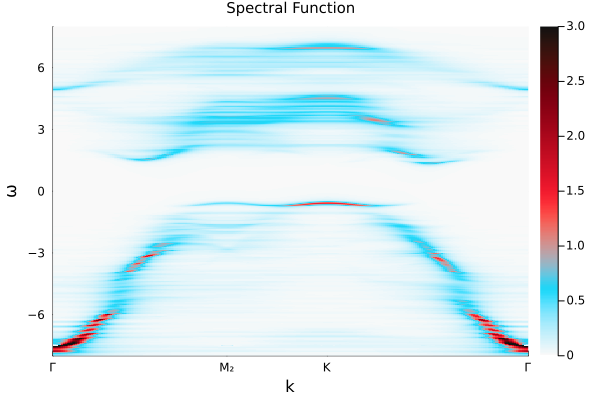

In [18]:
#moire TMD
#triangle lattice L=12
unitcell = Lattice([0, 0]; vectors = [[1, 0], [-1/2, √3/2]])
cluster = Lattice([0.0, 0.0], [1, 0], [-1/2, √3/2], [1/2, √3/2], [3/2, √3/2], 
[-1, √3], [0, √3], [1, √3], [2, √3], [-1/2, 3√3/2], [1/2, 3√3/2], [3/2, 3√3/2]; vectors = [[3, √3], [-3, √3]])
hilbert = Hilbert(site=>Fock{:f}(1, 2) for site=1:length(cluster))
cons = Conservation(12, 1//2; np=12,sz=0)
t = Hopping(:t, Complex(-1.0), 1)
U = Hubbard(:U, Complex(8.0))
origiterms = (t, U)
referterms = (t, U)
neighbors = Neighbors(0=>0.0, 1=>1.0)
@time vca = VCA(unitcell, cluster, hilbert, origiterms, referterms, cons; neighbors=neighbors, m=200)
#saveData(vca, "./temp/triangleL12U8_vca.jls")
#vca = loadData("./temp/triangleL12U8_vca.jls")
k_path = ReciprocalPath(reciprocals(unitcell.vectors), hexagon"Γ-M₂-K-Γ, 60°", length=100)
ω_range = range(-8, 8, length=400)
fq = ω_range .+ (Parameters(vca.origigenerator)[:U]/2 + 0.05*im)
@time G = singleParticleGreenFunction(vca, k_path, fq)
A = spectrum(G)
f = plot(k_path, ω_range, A; xlabel="k", ylabel="ω", color=colorbar, title="Spectral Function",clims=(0, 3))
#savefig("./results/triangleL12U8_spec.pdf")